Support vector classifier implementation


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
##lets create synthetic data points 
from sklearn.datasets import make_classification



In [63]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0,random_state=42)

In [64]:
pd.DataFrame(X)[0]

0     -0.999102
1      1.246686
2      0.962777
3     -2.957441
4      1.141165
         ...   
995   -0.432774
996    1.020438
997   -0.101267
998    0.643761
999    0.698530
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

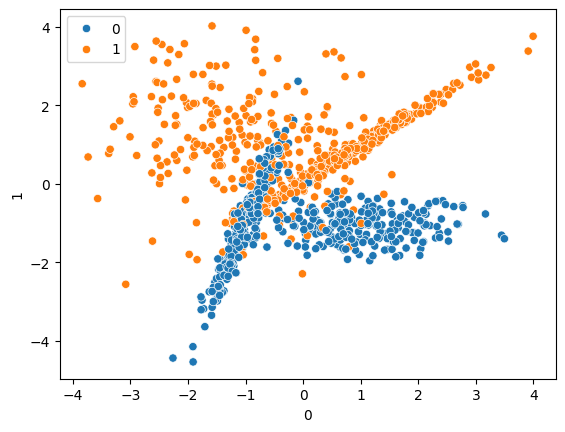

In [65]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [67]:
from sklearn.svm import SVC

In [68]:
svc=SVC(kernel='linear')

In [69]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [70]:
y_pred=svc.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       122
           1       0.90      0.85      0.88       128

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

[[110  12]
 [ 19 109]]


In [73]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,y_train)


SVC()

In [74]:
y_pred1=rbf.predict(X_test)

In [78]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       122
           1       0.94      0.86      0.90       128

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[115   7]
 [ 18 110]]


In [79]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
y_pred2=polynomial.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.94      0.75      0.83       122
           1       0.80      0.95      0.87       128

    accuracy                           0.85       250
   macro avg       0.87      0.85      0.85       250
weighted avg       0.87      0.85      0.85       250

[[ 91  31]
 [  6 122]]


In [80]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred3=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       122
           1       0.75      0.78      0.76       128

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

[[ 88  34]
 [ 28 100]]


In [85]:
from sklearn.model_selection import GridSearchCV

param_grid={'c':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']

}

In [86]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [87]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


ValueError: Invalid parameter 'c' for estimator SVC(). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].